### Supplimental document

This document presents supplimental material used to test Q-learning algorithm for Udacity's self-driving cab project for [Udacity's machine learning nano-degree](https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009). First I import required packages in python.

In [25]:
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator
from agent_Q import LearningAgent as Q_learner
from agent_Q_2states import LearningAgent as Q_learner_2s
import numpy as np

from agent_random import LearningAgent as Random_learner
import operator
import matplotlib.pyplot as plt

%pylab inline
## Makes sure code from scripts above are loaded.
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


Next I defined functions that take in different parameters and run simulations. 

In [170]:
def simulate_env_Random(learner,Num_sim = 1000,num_dummies = 3,gamma = 0.1,alpha = 0.1):
    e = Environment() 
    a = e.create_agent(learner) 
    e.num_dummies = num_dummies
    a.gamma = gamma
    a.alpha = alpha
    #a.Q_prev = []
    Q_all = []
    given_time_all = []
    steps_all = []
    for i in range(Num_sim):
        e.set_primary_agent(a, enforce_deadline=False)  
        sim = Simulator(e, update_delay=-1, display=False)  
        sim.run(n_trials=1)
        steps_all.append(e.steps_end)
        given_time_all.append(e.given_time)
    Q_agent = []
    return steps_all,given_time_all,Q_agent

def simulate_env_Q(learner,Num_sim = 1000,num_dummies = 3,gamma = 0.1,alpha = 0.1):
    e = Environment() 
    a = e.create_agent(learner) 
    e.num_dummies = num_dummies
    a.gamma = gamma
    a.alpha = alpha
    #a.Q_prev = []
    Q_all = []
    given_time_all = []
    steps_all = []
    for i in range(Num_sim):
        e.set_primary_agent(a, enforce_deadline=False)  
        sim = Simulator(e, update_delay=-1, display=False)  
        sim.run(n_trials=1)
        steps_all.append(e.steps_end)
        given_time_all.append(e.given_time)
    Q_agent = a.Q_prev
    return steps_all,given_time_all,Q_agent

def get_failure_points(given_time_all,steps_all,threshold):
    ind_not_reached = [i for i in range(len(given_time_all)) \
                   if ((steps_all[i])<-threshold)]
    steps_not_reached = [steps_all[i] for i in range(len(given_time_all)) \
                     if ((steps_all[i])<-threshold)]
    return ind_not_reached,steps_not_reached

### Random agent

First I test a random agent. This agent takes random steps, and moves around the environment.

In [228]:
### Different learning results

steps_all_3_r,given_time_all_3_r,Q_agent_3_r = \
    simulate_env_Random(Random_learner,100,3,0.1,0.1)

Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.

### Random agent: Performance

Plot below shows the performance of a random agent. The random agent was able to reach the target within deadline for about 20% of the trials, but in almost 25% of the trials, could not find the target destination even after 100 steps past the deadline. 

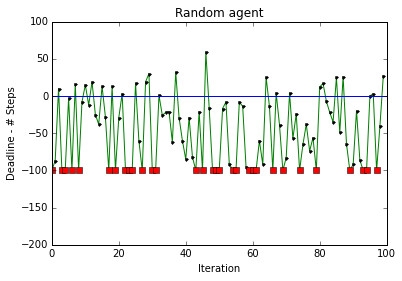

In [171]:
plt.plot(steps_all_3_r,'g',steps_all_3_r,'k.')

threshold = 99;
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_3_r,
                                                       steps_all_3_r,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.plot([0,100],[0,0])
plt.ylim(-200,100)
plt.title('Random agent')
plt.xlabel('Iteration')
plt.ylabel('Deadline - # Steps')


In [231]:
# Training different learners
steps_all_2s_3,given_time_all_2s_3,Q_agent_2s_3 = \
    simulate_env_Q(Q_learner_2s,100,3,0.1,1)
steps_all_3,given_time_all_3,Q_agent_3 = \
    simulate_env_Q(Q_learner,100,3,0.1,1)

steps_all_2s_20,given_time_all_2s_20,Q_agent_2s_20 = \
    simulate_env_Q(Q_learner_2s,100,20,0.1,1)
steps_all_20,given_time_all_20,Q_agent_20 = \
    simulate_env_Q(Q_learner,100,20,0.1,1)
    

steps_all_2s_40,given_time_all_2s_40,Q_agent_2s_40 = \
    simulate_env_Q(Q_learner_2s,100,40,0.1,1)
steps_all_40,given_time_all_40,Q_agent_40 = \
    simulate_env_Q(Q_learner,100,40,0.1,1)

Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.

### Q-learning agent: Performance,  5 states (traffic light, 3 X oncoming traffic, way-point)

Plots below shows the performance of a Q-learning agent for \\( \alpha = 1\\) and \\( \gamma = 0.1 \\) with information of 5 states  (traffic light, 3 X oncoming traffic, way-point), for 3, 20 and 40 other agents in the environment. The Q-learning agent performed much better than the random agent for all the cases, and was able to reach the destination within deadline. 

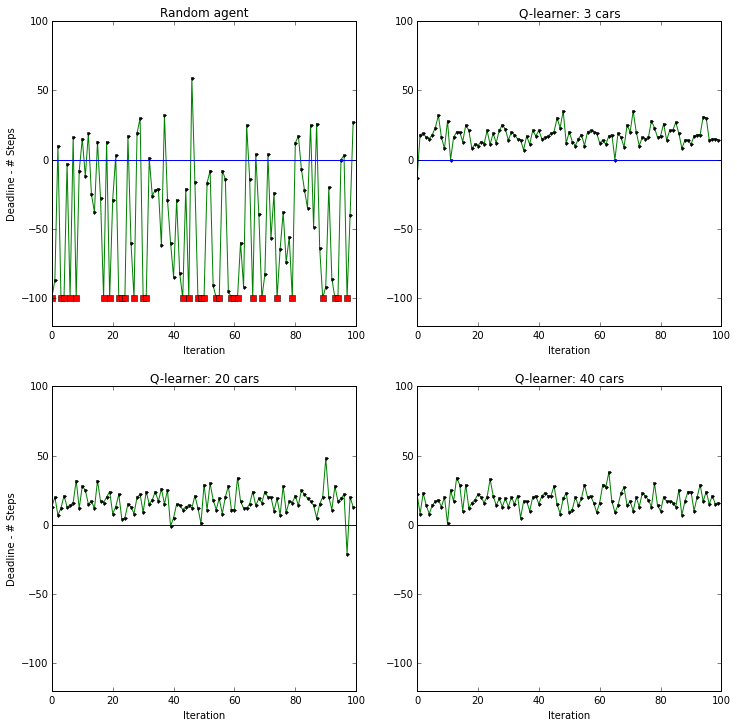

In [225]:
plt.figure(figsize=(12,12));
plt.subplot(2,2,1)
plt.plot(steps_all_3_r,'g',steps_all_3_r,'k.')
plt.ylim(-120,100)
plt.title('Random agent')
plt.xlabel('Iteration')
plt.ylabel('Deadline - # Steps')
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_3_r,
                                                       steps_all_3_r,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.plot([0,100],[0,0])


plt.subplot(2,2,2)
plt.plot(steps_all_3,'g',steps_all_3,'k.')
plt.title('Q-learner: 3 cars')
plt.xlabel('Iteration')
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_3,
                                                       steps_all_3,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.ylim(-120,100)
plt.plot([0,100],[0,0])

plt.subplot(2,2,3)
plt.plot(steps_all_20,'g',steps_all_20,'k.')
plt.title('Q-learner: 20 cars')
plt.xlabel('Iteration')
plt.ylabel('Deadline - # Steps')

ind_not_reached,steps_not_reached = get_failure_points(given_time_all_20,
                                                       steps_all_20,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.ylim(-120,100)
plt.plot([0,100],[0,0])


plt.subplot(2,2,4)
plt.plot(steps_all_40,'g',steps_all_40,'k.')
plt.title('Q-learner: 40 cars')
plt.xlabel('Iteration')
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_40,
                                                       steps_all_40,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.ylim(-120,100)
plt.plot([0,100],[0,0])

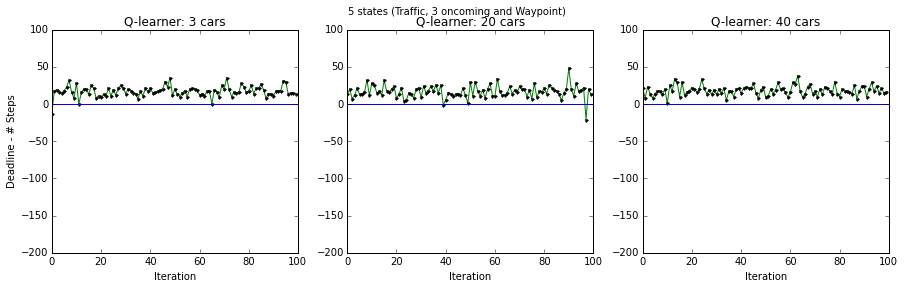

In [226]:
plt.figure(figsize=(15,4));

plt.subplot(1,3,1)
plt.plot(steps_all_3,'g',steps_all_3,'k.')
plt.title('Q-learner: 3 cars')
plt.ylabel('Deadline - # Steps')

plt.xlabel('Iteration')
plt.ylim(-200,100)
plt.plot([0,100],[0,0])

plt.subplot(1,3,2)
plt.plot(steps_all_20,'g',steps_all_20,'k.')
plt.title('Q-learner: 20 cars')
plt.xlabel('Iteration')
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_20,
                                                       steps_all_20,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.ylim(-200,100)
plt.plot([0,100],[0,0])

plt.subplot(1,3,3)
plt.plot(steps_all_40,'g',steps_all_40,'k.')
plt.title('Q-learner: 40 cars')
plt.xlabel('Iteration')
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_40,
                                                       steps_all_40,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.ylim(-200,100)
plt.plot([0,100],[0,0])
plt.suptitle('5 states (Traffic, 3 oncoming and Waypoint)')

In [198]:
Q_agent_40_srt = sorted(Q_agent_40.items(),key=operator.itemgetter(1),reverse=True)
Q_agent_20_srt = sorted(Q_agent_20.items(),key=operator.itemgetter(1),reverse=True)
Q_agent_3_srt = sorted(Q_agent_3.items(),key=operator.itemgetter(1),reverse=True)

In [211]:
import pandas as pd
Q_agent_40_srt = sorted(Q_agent_40.items(),key=operator.itemgetter(1),reverse=True)
Q_agent_20_srt = sorted(Q_agent_20.items(),key=operator.itemgetter(1),reverse=True)
Q_agent_3_srt = sorted(Q_agent_3.items(),key=operator.itemgetter(1),reverse=True)
df = {'Q-3 (light,oncoming,left,right,way-point,action)': pd.Series(Q_agent_3_srt[0:10]),
     'Q-20 (light,oncoming,left,right,way-point,action)': pd.Series(Q_agent_20_srt[0:10]),
     'Q-40 (light,oncoming,left,right,way-point,action)': pd.Series(Q_agent_40_srt[0:10])}
pd.DataFrame(data = df)

,"Q-20 (light,oncoming,left,right,way-point,action)","Q-3 (light,oncoming,left,right,way-point,action)","Q-40 (light,oncoming,left,right,way-point,action)"
0,"(green,None,None,None,forward,forward, 8.21193...","(green,None,None,None,forward,forward, 6.19096...","(green,None,None,None,forward,forward, 4.24322..."
1,"(green,None,None,None,right,right, 64941.1002869)","(green,None,None,None,left,left, 22129.5384059)","(green,None,None,None,right,right, 59628.9861742)"
2,"(green,None,None,None,left,left, 24285.9658697)","(red,None,None,None,right,right, 10691.9014387)","(green,None,None,None,left,left, 36041.6381496)"
3,"(red,None,None,None,right,right, 22004.8156005)","(green,None,None,None,right,right, 9590.26253166)","(red,None,None,None,right,right, 27074.0837384)"
4,"(green,None,None,right,forward,forward, 16.62)","(green,left,None,None,forward,forward, 28.74122)","(green,None,None,right,forward,forward, 14.2)"
5,"(green,left,None,None,forward,forward, 15.2)","(green,None,None,forward,forward,forward, 19.282)","(green,None,left,None,forward,forward, 14.2)"
6,"(green,None,None,left,forward,forward, 14.2)","(green,None,None,left,left,left, 4.2)","(green,left,None,None,left,left, 12.0)"
7,"(green,None,None,forward,forward,forward, 12.0)","(green,None,None,right,forward,forward, 4.2)","(green,None,None,forward,forward,forward, 12.0)"
8,"(green,None,left,None,forward,forward, 9.282)","(green,None,left,None,right,right, 4.2)","(green,None,None,left,forward,forward, 6.62)"
9,"(green,None,forward,None,right,right, 4.2)","(green,None,None,left,forward,forward, 4.2)","(green,right,None,None,forward,forward, 4.2)"


### Q-learning agent: Performance, 2 states (traffic light, way-point)

Plots below shows the performance of a Q-learning agent for \\( \alpha = 1\\) and \\( \gamma = 0.1 \\) with information of 2 states  (traffic light, way-point), for 3, 20 and 40 other agents in the environment. The Q-learning agent performed much better than the random agent when there were only 3 agents in the environment. For more agents, the Q-learning algorithm could not find the target, especially when the number of agents increased from 20 to 40. 

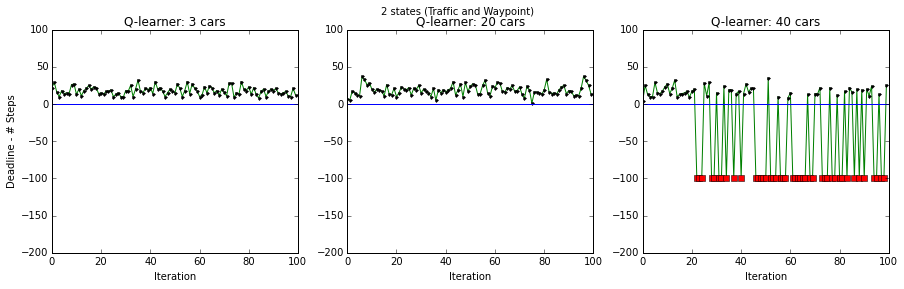

In [232]:
plt.figure(figsize=(15,4));

plt.subplot(1,3,1)
plt.plot(steps_all_2s_3,'g',steps_all_2s_3,'k.')
plt.title('Q-learner: 3 cars')
plt.ylabel('Deadline - # Steps')

plt.xlabel('Iteration')
plt.ylim(-200,100)
plt.plot([0,100],[0,0])

plt.subplot(1,3,2)
plt.plot(steps_all_2s_20,'g',steps_all_2s_20,'k.')
plt.title('Q-learner: 20 cars')
plt.xlabel('Iteration')
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_2s_20,
                                                       steps_all_2s_20,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.ylim(-200,100)
plt.plot([0,100],[0,0])

plt.subplot(1,3,3)
plt.plot(steps_all_2s_40,'g',steps_all_2s_40,'k.')
plt.title('Q-learner: 40 cars')
plt.xlabel('Iteration')
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_2s_40,
                                                       steps_all_2s_40,threshold)
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.ylim(-200,100)
plt.plot([0,100],[0,0])

plt.suptitle('2 states (Traffic and Waypoint)')

### Q-learning agent: Performance tuning, 5 states (traffic light, 3X oncoming traffic, way-point)

I next varied \\( \alpha \\) and \\( \gamma \\) between 0 and 1 in steps of 0.1, and calculated number of times the smartcab misses the destination in 100 trials. Results indicate that the Q-learning algorith is robust to changes in \\( \alpha \\) and \\( \gamma \\), and in all cases the number of times destination was missed was less than 2. Based on this, I chose \\( \alpha = 0.3 \\) and \\( \gamma = 0.5 \\). 

In [133]:
alpha_all = np.arange(0.1,1.1,0.1)
gamma_all = np.arange(0.1,1.1,0.1)
Num_fail_all = []
alpha_all,gamma_all = np.meshgrid(alpha_all,gamma_all)

Z_all = np.zeros((len(alpha_all),len(gamma_all)))
for i_alpha in range(len(alpha_all)):
    for i_gamma in range(len(gamma_all)):
        steps_all_3,given_time_all_3,Q_agent_3 = \
            simulate_env_Q(Q_learner,100,3,
                           gamma_all[i_alpha][i_gamma],alpha_all[i_alpha][i_gamma])
        num_fail = [i for i in steps_all_3 if i<0]
        Z_all[i_alpha][i_gamma] = len(num_fail)

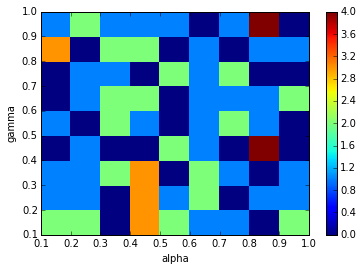

In [213]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(alpha_all,gamma_all,Z_all)
plt.colorbar(heatmap)
plt.xlabel('alpha')
plt.ylabel('gamma')


### Q-learning agent: Optimal performance

Optimal performance was obtained for \\( \alpha = 0.3 \\) and \\( \gamma = 0.5 \\). Simulation results indicate that of 100 trials, the smartcab missed destination in only 1 tiral, when the number of agents in environment was 40. 

In [155]:
steps_all_3,given_time_all_3,Q_agent_3 = \
            simulate_env_Q(Q_learner,100,3,
                           .5,.3)
steps_all_20,given_time_all_20,Q_agent_20 = \
            simulate_env_Q(Q_learner,100,20,
                           .5,.3)
steps_all_40,given_time_all_40,Q_agent_40 = \
            simulate_env_Q(Q_learner,100,40,
                           .5,.3)

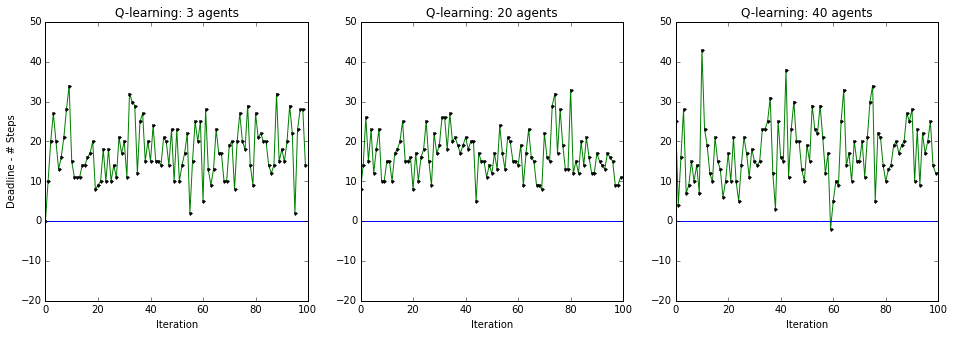

In [156]:

threshold = 99;
ind_not_reached,steps_not_reached = get_failure_points(given_time_all_3,
                                        steps_all_3,threshold)

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.plot(steps_all_3,'g',steps_all_3,'k.')
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.plot([0,100],[0,0])
plt.ylim(-20,50)
plt.title('Q-learning: 3 agents')
plt.xlabel('Iteration')
plt.ylabel('Deadline - # Steps')

plt.subplot(1,3,2)
plt.plot(steps_all_20,'g',steps_all_20,'k.')
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.plot([0,100],[0,0])
plt.ylim(-20,50)
plt.title('Q-learning: 20 agents')
plt.xlabel('Iteration')

plt.subplot(1,3,3)
plt.plot(steps_all_40,'g',steps_all_40,'k.')
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.plot([0,100],[0,0])
plt.ylim(-20,50)
plt.title('Q-learning: 40 agents')
plt.xlabel('Iteration')


In [214]:
import pandas as pd
Q_agent_40_srt = sorted(Q_agent_40.items(),key=operator.itemgetter(1),reverse=True)
Q_agent_20_srt = sorted(Q_agent_20.items(),key=operator.itemgetter(1),reverse=True)
Q_agent_3_srt = sorted(Q_agent_3.items(),key=operator.itemgetter(1),reverse=True)
df = {'Q-3 (light,oncoming,left,right,way-point,action)': pd.Series(Q_agent_3_srt[0:10]),
     'Q-20 (light,oncoming,left,right,way-point,action)': pd.Series(Q_agent_20_srt[0:10]),
     'Q-40 (light,oncoming,left,right,way-point,action)': pd.Series(Q_agent_40_srt[0:10])}
pd.DataFrame(data = df)

,"Q-20 (light,oncoming,left,right,way-point,action)","Q-3 (light,oncoming,left,right,way-point,action)","Q-40 (light,oncoming,left,right,way-point,action)"
0,"(green,None,None,None,forward,forward, 8.21193...","(green,None,None,None,forward,forward, 6.19096...","(green,None,None,None,forward,forward, 4.24322..."
1,"(green,None,None,None,right,right, 64941.1002869)","(green,None,None,None,left,left, 22129.5384059)","(green,None,None,None,right,right, 59628.9861742)"
2,"(green,None,None,None,left,left, 24285.9658697)","(red,None,None,None,right,right, 10691.9014387)","(green,None,None,None,left,left, 36041.6381496)"
3,"(red,None,None,None,right,right, 22004.8156005)","(green,None,None,None,right,right, 9590.26253166)","(red,None,None,None,right,right, 27074.0837384)"
4,"(green,None,None,right,forward,forward, 16.62)","(green,left,None,None,forward,forward, 28.74122)","(green,None,None,right,forward,forward, 14.2)"
5,"(green,left,None,None,forward,forward, 15.2)","(green,None,None,forward,forward,forward, 19.282)","(green,None,left,None,forward,forward, 14.2)"
6,"(green,None,None,left,forward,forward, 14.2)","(green,None,None,left,left,left, 4.2)","(green,left,None,None,left,left, 12.0)"
7,"(green,None,None,forward,forward,forward, 12.0)","(green,None,None,right,forward,forward, 4.2)","(green,None,None,forward,forward,forward, 12.0)"
8,"(green,None,left,None,forward,forward, 9.282)","(green,None,left,None,right,right, 4.2)","(green,None,None,left,forward,forward, 6.62)"
9,"(green,None,forward,None,right,right, 4.2)","(green,None,None,left,forward,forward, 4.2)","(green,right,None,None,forward,forward, 4.2)"
